# Data import and test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [14]:
name_data_file="Indian Liver Patient Dataset (ILPD)"

data = pd.read_csv(f"../raw_data/{name_data_file}.csv", na_values=["?"], header= None)

In [15]:
data


,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       583 non-null    int64  
 1   1       583 non-null    object 
 2   2       583 non-null    float64
 3   3       583 non-null    float64
 4   4       583 non-null    int64  
 5   5       583 non-null    int64  
 6   6       583 non-null    int64  
 7   7       583 non-null    float64
 8   8       583 non-null    float64
 9   9       579 non-null    float64
 10  10      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [21]:
print("Original shape:", data.shape)

# DataFrame w/o missing values and duplicates  
df_clean = data.dropna()
df_clean = df_clean.drop_duplicates()

# shape after cleaning
print("Shape after dropna:", df_clean.shape)

# dropped rows
dropped_rows = data.loc[data.index.difference(df_clean.index)]

print("\n Rows dropped:", dropped_rows.shape[0])
print("\n Head of dropped.rows:")
dropped_rows.head()

Original shape: (583, 11)
Shape after dropna: (566, 11)

 Rows dropped: 17

 Head of dropped.rows:


,0,1,2,3,4,5,6,7,8,9,10
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.8,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.1,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.8,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.5,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.0,1


In [22]:
df_clean.head()

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 582
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       566 non-null    int64  
 1   1       566 non-null    object 
 2   2       566 non-null    float64
 3   3       566 non-null    float64
 4   4       566 non-null    int64  
 5   5       566 non-null    int64  
 6   6       566 non-null    int64  
 7   7       566 non-null    float64
 8   8       566 non-null    float64
 9   9       566 non-null    float64
 10  10      566 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 69.2+ KB


In [24]:
print(df_clean.columns)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')


In [25]:
# count how many numerical and categorical variables there are
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

print(f"Number of numerical variables: {len(num_cols)}")
print("Numerical variables:", list(num_cols))

print(f"\nNumber of categorical variables: {len(cat_cols)}")
print("Categorical variables:", list(cat_cols))


Number of numerical variables: 10
Numerical variables: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Number of categorical variables: 1
Categorical variables: [1]


In [26]:
df_clean.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10
count,566.000000,566,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.886926,NaN,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,1.286219
std,16.274893,NaN,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000


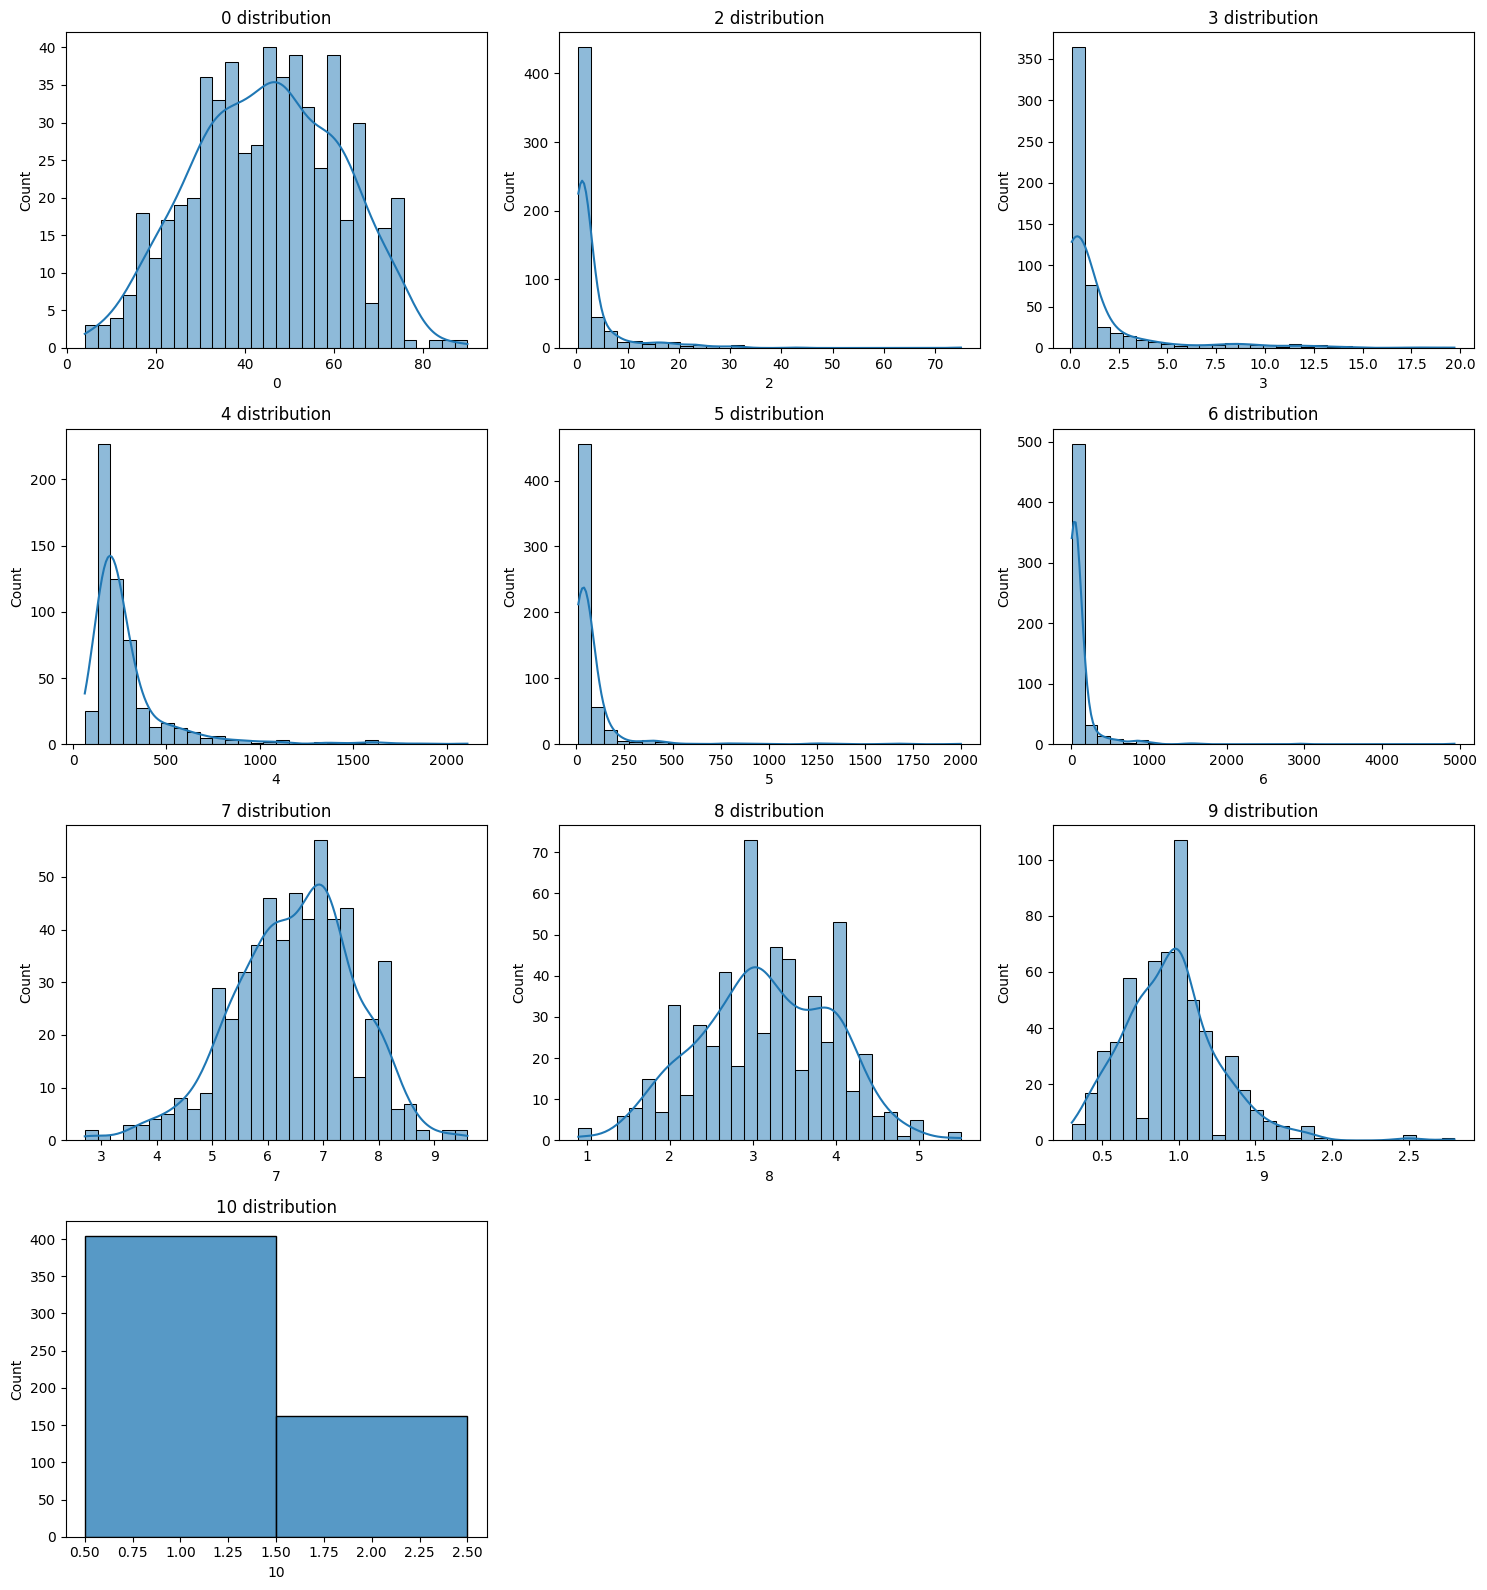

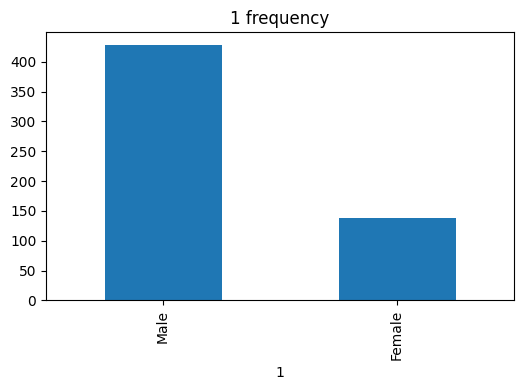

In [27]:
# numerical features
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
n_num = len(num_cols)

if n_num > 0:
    rows = math.ceil(n_num / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        # Count unique values (ignoring NaN)
        nunique = df_clean[col].nunique(dropna=True)
        
        # If binary or low-cardinality numeric feature: use discrete bins
        if nunique <= 10:
            sns.histplot(df_clean[col], discrete=True, ax=axes[i])
        else:
            # Otherwise use a standard histogram with KDE
            sns.histplot(df_clean[col], kde=True, bins=30, ax=axes[i])

        axes[i].set_title(f"{col} distribution")

    # Remove empty axes if grid > number of features
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# for categorical features
cat_cols = df_clean.select_dtypes(include=['object']).columns
n_cat = len(cat_cols)

if n_cat > 0:
    rows = math.ceil(n_cat / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        # Bar plot of value counts
        df_clean[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{col} frequency")

    # Remove empty axes if grid > number of features
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [37]:
data["FCVC"].unique()

array([2.      , 3.      , 1.      , 2.450218, 2.880161, 2.00876 ,
       2.596579, 2.591439, 2.392665, 1.123939, 2.027574, 2.658112,
       2.88626 , 2.714447, 2.750715, 1.4925  , 2.205439, 2.059138,
       2.310423, 2.823179, 2.052932, 2.596364, 2.767731, 2.815157,
       2.737762, 2.568063, 2.524428, 2.971574, 1.0816  , 1.270448,
       1.344854, 2.959658, 2.725282, 2.844607, 2.44004 , 2.432302,
       2.592247, 2.449267, 2.929889, 2.015258, 1.031149, 1.592183,
       1.21498 , 1.522001, 2.703436, 2.362918, 2.14084 , 2.5596  ,
       2.336044, 1.813234, 2.724285, 2.71897 , 1.133844, 1.757466,
       2.979383, 2.204914, 2.927218, 2.88853 , 2.890535, 2.530066,
       2.241606, 1.003566, 2.652779, 2.897899, 2.483979, 2.945967,
       2.478891, 2.784464, 1.005578, 2.938031, 2.842102, 1.889199,
       2.943749, 2.33998 , 1.950742, 2.277436, 2.371338, 2.984425,
       2.977018, 2.663421, 2.753752, 2.318355, 2.594653, 2.886157,
       2.967853, 2.619835, 1.053534, 2.530233, 2.8813  , 2.824